In [1]:
import json, yaml
import numpy as np
from matplotlib import pyplot as plt

## Load Data

In [2]:
with open("database9.json", "r") as readfile:
    database_statespace = (json.load(readfile))["data"]
with open("databasetransfer.json", "r") as readfile:
    database_transfer = (json.load(readfile))["data"]
# with open("database10.json", "r") as readfile:
#     database_platform = (json.load(readfile))["data"]
with open("../literature.yaml") as readfile:
    literature = (yaml.safe_load(readfile))

## Form Bridge Data Dictionary

In [3]:
bridge_data = {cesmd: {"sort_id": i} for i,cesmd in enumerate([
    "CE01336",
    "CE89324",
    "CE54730",
    "CE89708",
    "CE79421",
    "CE89686",
    "CE89735",
    "CE13795",
    "CE24704",
    "CE33742",
    "CE24775",
    "CE24706",
    "CE47315",
    "CE23631",
    "CE24694",
    "CE58658",
    "CE13705",
    "CE89736",
    "CE68185",
    "CE14406",
    "CE68184",
    "CE89973",
])}
station_ids = bridge_data.keys()

In [4]:
# Number of events before and after filtering state space modes
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["n_events"] = len(station_data["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"])
    bridge_data[station_data["cesmd"]]["n_events_filtered"] = len([evaluation for evaluation in station_data["events"]
                                                                if len([mode for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
                                                                    if mode["emac"]>0.5 and mode["mpc"]>0.5]) > 0])

In [5]:
# Literature, distribution and first
for station_id,sources in literature.items():
    bridge_data[station_id]["literature"] = {}
    if sources is not None:
        distribution = [period for source in sources.values() for event in source for method in event for period in method if period is not None]
        bridge_data[station_id]["literature"]["distribution"] = distribution
        first_periods = [method[0] for source in sources.values() for event in source for method in event]
        bridge_data[station_id]["literature"]["first"] = first_periods
    else:
        bridge_data[station_id]["literature"]["distribution"] = []
        bridge_data[station_id]["literature"]["first"] = []

In [6]:
# State space, first, unfiltered, distribution and average
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"] = {}
    bridge_data[station_data["cesmd"]]["platform"]["state_space"] = {}
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"] = {}
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["unfiltered"] = {}
    distribution = [np.max([mode["period"] for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]]) 
                        for evaluation in station_data["events"] 
                        if len(evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]) > 0]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["unfiltered"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["unfiltered"]["average"] = np.average(distribution) if len(distribution) > 0 else 0.0

In [7]:
# State space, first, filtered, distribution and average
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["filtered"] = {}
    distribution = [np.max([mode["period"] for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
                                if mode["emac"]>0.5 and mode["mpc"]>0.5]) 
                        for evaluation in station_data["events"] 
                        if len([mode["period"] for mode in evaluation["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"]["S1"]["data"]
                                if mode["emac"]>0.5 and mode["mpc"]>0.5]) > 0]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["filtered"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["first"]["filtered"]["average"] = np.average(distribution) if len(distribution) > 0 else 0.0

In [8]:
# State space, best, unfiltered, distribution and average
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"] = {}
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["unfiltered"] = {}
    distribution = [event["period"] for event in station_data["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"] if "period" in event]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["unfiltered"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["unfiltered"]["average"] = np.average(distribution)

/home/cmp/mambaforge/envs/brace-platform/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/cmp/mambaforge/envs/brace-platform/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [9]:
# State space, best, filtered, distribution and average
for station_data in database_statespace:
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["filtered"] = {}
    distribution = [event["period"] for event in station_data["summary"]["SPECTRAL_SHIFT_IDENTIFICATION"] if "period" in event and event["emac"] > 0.5 and event["mpc"] > 0.5]
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["filtered"]["distribution"] = distribution
    bridge_data[station_data["cesmd"]]["platform"]["state_space"]["best"]["filtered"]["average"] = np.average(distribution)

In [10]:
# Transfer, response spectrum and fourier
for station_data in database_transfer:
    bridge_data[station_data["cesmd"]]["platform"]["transfer"] = {}
    distribution = [result["data"][0]["period"] for event in station_data["events"] for S,result in event["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"].items() if S=='R1' if len(result["data"])>0]
    bridge_data[station_data["cesmd"]]["platform"]["transfer"]["response_spectrum"] = distribution
    distribution = [result["data"][0]["period"] for event in station_data["events"] for S,result in event["evaluation_data"]["SPECTRAL_SHIFT_IDENTIFICATION"]["summary"].items() if S=='F1' if len(result["data"])>0]
    bridge_data[station_data["cesmd"]]["platform"]["transfer"]["fourier"] = distribution

## Plot and View Bridge Data

In [11]:
bridges = [[
    "CE01336",
    "CE89324",
    "CE54730",
    "CE89708",
    ], [
    "CE79421",
    "CE89686",
    "CE89735",
    "CE13795",
    "CE24704",
    "CE33742",
    "CE24775",
    "CE24706",
    "CE47315",
    ], [
    "CE23631",
    "CE24694",
    "CE58658",
    "CE13705",
    "CE89736",
    ], [
    "CE68185",
    "CE14406",
    "CE68184",
    "CE89973",
]]

for group in bridges:
    for i,bridge in enumerate(group):
        print(bridge,  end=" \t")
        for ref in [sorted([(station, bridge_data[station]["platform"]["state_space"]["best"]["filtered"]["average"]) for station in station_ids], key=lambda x: x[1]),
                    sorted([(station, bridge_data[station]["platform"]["state_space"]["first"]["filtered"]["average"]) for station in station_ids], key=lambda x: x[1]),
                    sorted([(station, bridge_data[station]["platform"]["state_space"]["first"]["unfiltered"]["average"]) for station in station_ids], key=lambda x: x[1])]:
            # list(...) is just turning the first column of ref into a list
            grouped_ref = [i for i in list(zip(*ref))[0] if i in group]
            idx = grouped_ref.index(bridge)
            print(idx, end="\t")
        print("")
    print("-"*10)

CE01336 	3	2	2	
CE89324 	2	1	1	
CE54730 	0	0	0	
CE89708 	1	3	3	
----------
CE79421 	8	8	8	
CE89686 	7	6	6	
CE89735 	6	7	7	
CE13795 	4	3	3	
CE24704 	5	5	5	
CE33742 	3	2	2	
CE24775 	2	4	4	
CE24706 	0	0	0	
CE47315 	1	1	1	
----------
CE23631 	3	3	3	
CE24694 	4	0	0	
CE58658 	1	4	4	
CE13705 	0	1	1	
CE89736 	2	2	2	
----------
CE68185 	1	1	0	
CE14406 	3	3	2	
CE68184 	0	0	1	
CE89973 	2	2	3	
----------


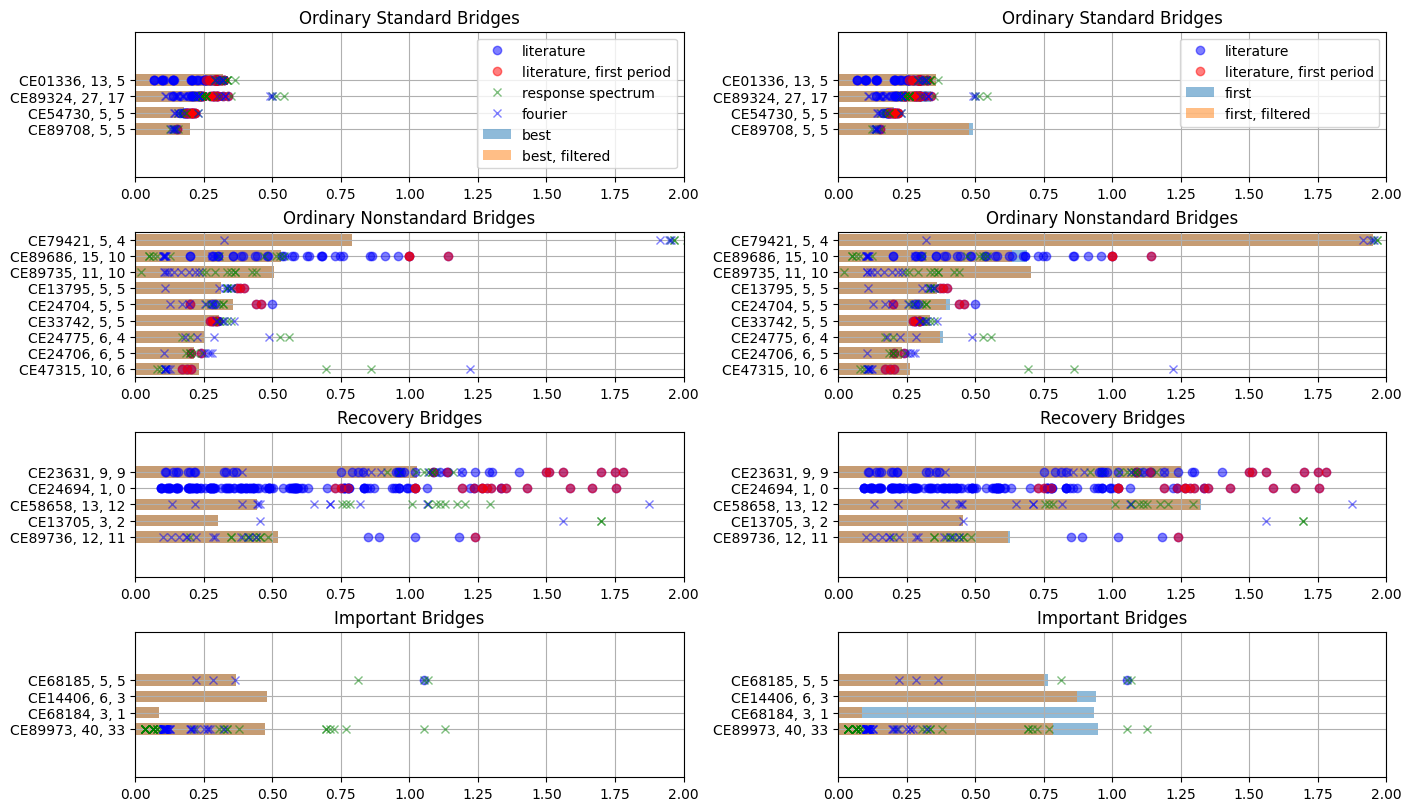

In [17]:
titles = ["Ordinary Standard Bridges", "Ordinary Nonstandard Bridges", "Recovery Bridges", "Important Bridges"]
fig, ax = plt.subplots(len(bridges),2,figsize=(14,8), constrained_layout=True)
for i,group in enumerate(bridges):
    bridge_data_group = {key: value for key,value in bridge_data.items() if key in group}
    stations_ordered = sorted(bridge_data_group.keys(), key=lambda x: bridge_data_group[x]["sort_id"])
    station_labels = [station+", "+str((bridge_data_group[station])["n_events"])+", "+str(bridge_data_group[station]["n_events_filtered"]) for station in stations_ordered]
    station_indices = (10/2)-(10/9)*((len(group)-1)/2-np.arange(len(station_labels)))
    for (j,station_index),station in zip(enumerate(station_indices),reversed(stations_ordered)):
        ax[i,0].plot(bridge_data_group[station]["literature"]["distribution"],[station_index]*len(bridge_data_group[station]["literature"]["distribution"]),"bo",label=["literature" if j==0 else None][0],alpha=0.5)
        ax[i,0].plot(bridge_data_group[station]["literature"]["first"],[station_index]*len(bridge_data_group[station]["literature"]["first"]),"ro",label=["literature, first period" if j==0 else None][0],alpha=0.5)
        ax[i,1].plot(bridge_data_group[station]["literature"]["distribution"],[station_index]*len(bridge_data_group[station]["literature"]["distribution"]),"bo",label=["literature" if j==0 else None][0],alpha=0.5)
        ax[i,1].plot(bridge_data_group[station]["literature"]["first"],[station_index]*len(bridge_data_group[station]["literature"]["first"]),"ro",label=["literature, first period" if j==0 else None][0],alpha=0.5)
        for k in range(2):
            ax[i,k].plot(bridge_data_group[station]["platform"]["transfer"]["response_spectrum"],[station_index]*len(bridge_data_group[station]["platform"]["transfer"]["response_spectrum"]),"gx",label=["response spectrum" if j==k==0 else None][0],alpha=0.5)
            ax[i,k].plot(bridge_data_group[station]["platform"]["transfer"]["fourier"],[station_index]*len(bridge_data_group[station]["platform"]["transfer"]["fourier"]),"bx",label=["fourier" if j==k==0 else None][0],alpha=0.5)
    ax[i,0].barh(station_indices, [bridge_data_group[station]["platform"]["state_space"]["best"]["unfiltered"]["average"] for station in reversed(stations_ordered)], label="best", alpha=0.5)
    ax[i,0].barh(station_indices, [bridge_data_group[station]["platform"]["state_space"]["best"]["filtered"]["average"] for station in reversed(stations_ordered)], label="best, filtered", alpha=0.5)
    ax[i,1].barh(station_indices, [bridge_data_group[station]["platform"]["state_space"]["first"]["unfiltered"]["average"] for station in reversed(stations_ordered)], label="first", alpha=0.5)
    ax[i,1].barh(station_indices, [bridge_data_group[station]["platform"]["state_space"]["first"]["filtered"]["average"] for station in reversed(stations_ordered)], label="first, filtered", alpha=0.5)
    for j in range(2):
        ax[i,j].set_yticks(np.flip(station_indices))
        ax[i,j].set_yticklabels(station_labels)
        # ax[i,j].set_xlim(0,8)
        ax[i,j].set_xlim(0,2)
        ax[i,j].set_ylim(0,10)
        ax[i,j].grid("on")
        ax[0,j].legend()
        ax[i,j].set_title(titles[i])

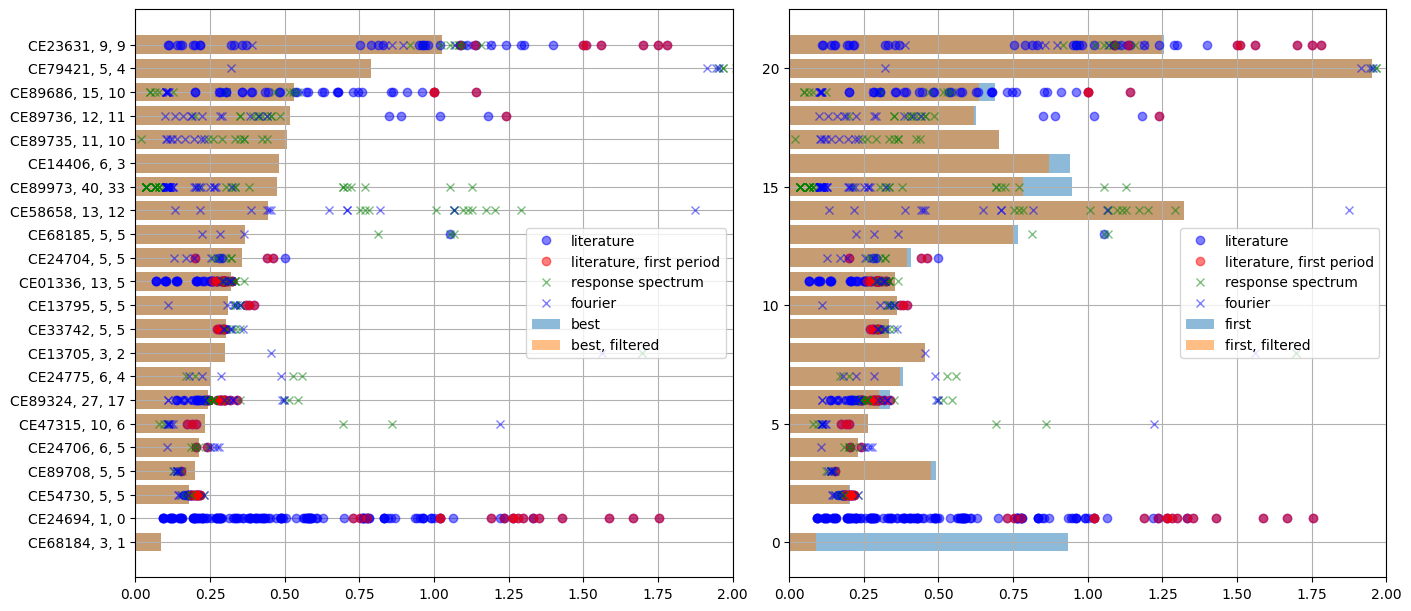

In [13]:
stations_ordered = sorted(bridge_data.keys(), key=lambda x: -bridge_data[x]["platform"]["state_space"]["best"]["filtered"]["average"])
# stations_ordered = sorted(bridge_data.keys(), key=lambda x: bridge_data[x]["sort_id"])
station_labels = [station+", "+str((bridge_data[station])["n_events"])+", "+str(bridge_data[station]["n_events_filtered"]) for station in stations_ordered]
station_indices = np.arange(len(station_labels))
fig, ax = plt.subplots(1,2,figsize=(14,6), constrained_layout=True)
for (i,station_index),station in zip(enumerate(station_indices),reversed(stations_ordered)):
    ax[0].plot(bridge_data[station]["literature"]["distribution"],[station_index]*len(bridge_data[station]["literature"]["distribution"]),"bo",label=["literature" if i==0 else None][0],alpha=0.5)
    ax[0].plot(bridge_data[station]["literature"]["first"],[station_index]*len(bridge_data[station]["literature"]["first"]),"ro",label=["literature, first period" if i==0 else None][0],alpha=0.5)
    ax[1].plot(bridge_data[station]["literature"]["distribution"],[station_index]*len(bridge_data[station]["literature"]["distribution"]),"bo",label=["literature" if i==0 else None][0],alpha=0.5)
    ax[1].plot(bridge_data[station]["literature"]["first"],[station_index]*len(bridge_data[station]["literature"]["first"]),"ro",label=["literature, first period" if i==0 else None][0],alpha=0.5)
    for j in range(2):
        ax[j].plot(bridge_data[station]["platform"]["transfer"]["response_spectrum"],[station_index]*len(bridge_data[station]["platform"]["transfer"]["response_spectrum"]),"gx",label=["response spectrum" if i==0 else None][0],alpha=0.5)
        ax[j].plot(bridge_data[station]["platform"]["transfer"]["fourier"],[station_index]*len(bridge_data[station]["platform"]["transfer"]["fourier"]),"bx",label=["fourier" if i==0 else None][0],alpha=0.5)
ax[0].barh(station_indices, [bridge_data[station]["platform"]["state_space"]["best"]["unfiltered"]["average"] for station in reversed(stations_ordered)], label="best", alpha=0.5)
ax[0].barh(station_indices, [bridge_data[station]["platform"]["state_space"]["best"]["filtered"]["average"] for station in reversed(stations_ordered)], label="best, filtered", alpha=0.5)
ax[1].barh(station_indices, [bridge_data[station]["platform"]["state_space"]["first"]["unfiltered"]["average"] for station in reversed(stations_ordered)], label="first", alpha=0.5)
ax[1].barh(station_indices, [bridge_data[station]["platform"]["state_space"]["first"]["filtered"]["average"] for station in reversed(stations_ordered)], label="first, filtered", alpha=0.5)
ax[0].set_yticks(np.flip(station_indices))
ax[0].set_yticklabels(station_labels)
for i in range(2):
    # ax[i].set_xlim(0,8)
    ax[i].set_xlim(0,2)
    ax[i].grid("on")
    ax[i].legend()

## SDC V2.0 https://dot.ca.gov/-/media/dot-media/programs/engineering/documents/seismicdesigncriteria-sdc/202007-seismicdesigncriteria-v2-a11y.pdf

### Standard Bridges
1. Each span length $<300$ ft
2. Superstructure $\in$ [Box Girder, Slab on Girder, Slab]
3. Substructure $\in$ [Solid Column-Type, Pile-Bent]
4. $T_{1,\text{longitudinal}} \geq 0.7$ s,   $~~~T_{1,\text{transverse}} \geq 0.7$ s
5. $D_\text{fault}$ $<300$ ft

### Nonstandard Bridge Example Features

**Irregular Geometry**
- Multiple superstructure levels
- Bifurcating superstructures
- Skew angles (greater than 20°) that vary from support to support, excluding curved bridges with circular or square columns
- Hollow columns

**Unusual Framing**
- Outrigger and C bent supports
- Unsymmetrical layout of columns within a bent
- Unbalanced mass and/or stiffness distribution
- Multiple superstructure types
- Pier walls
- Isolation bearings and dampers
- Single column bents supported on spread footings

**Unusually complex bridges**
- Cable-stayed
- Suspension
- Arch
- Truss

**Uncommon bridge Substructure (Foundation)**
- Micropiles
- Hollow concrete piles
- Other nonstandard piles such as timber, tapered, and composite piles
Unusual Soil/Hazard
- Class S2 soil that has been modified (See Section 6.1.3 for definition of class S2 soil)
- Tsunami
- Lateral spreading induced by liquefaction

### Recovery Bridges


### Important Bridges
- Expected to provide immediate access to emergency and similar life-safety facilities after an earthquake
- Time to restore functionality after closure would create a major economic impact
- Formally designated as critical by a local emergency management plan

In [14]:
standard_bridges = [
    
]
    
nonstandard_bridges = [

]